In [1]:
from methods.our_method import Our_method
from evaluator.evaluator import *
from evaluator.sample_generator import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import time
import numpy as np

In [2]:
n_features=16
n_samples=100
n_packs=101
s=16

In [4]:
#evaluator.t11_eval(alg)
# A_alg=our_method(n_features)
# Trans_lasso=trans_lasso(n_features)
# lasso=t_lasso(n_features)
# models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
models=[Our_method(n_features,s,1)]
SSE=np.zeros((3,3,13))
times=np.zeros((3,3,13))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,10]:
        for L in [2,4,8,12,16,20,24,28,32,36,40,44,48]:
            eval=evaluator(repeat_times=5)
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            for model in models:
                model_time,model_sse=eval.eval(model,sample_packs,coef_true,s,L)
                SSE[int(h/5),models.index(model),int(L/4)]+=model_sse
                times[int(h/5),models.index(model),int(L/4)]+=model_time
    # break
SSE=SSE/(i+1)
        

  0%|          | 0/100 [00:00<?, ?it/s]


AssertionError: 

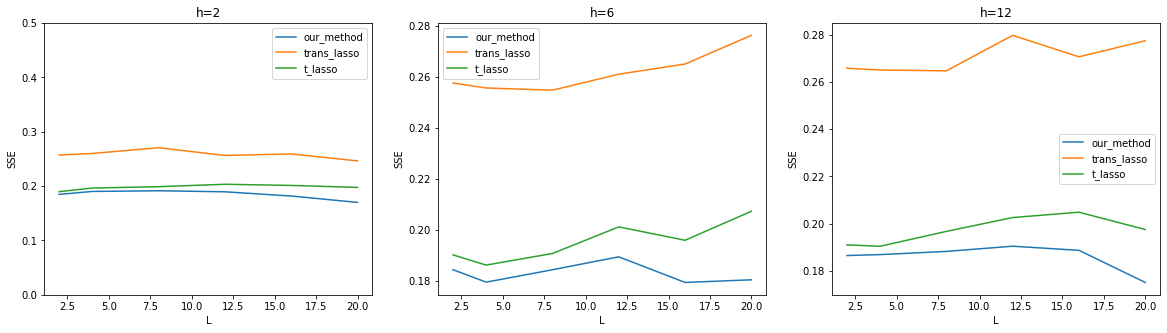

In [ ]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=12') 

#设置图像大小
plt.show()

In [8]:
SSE

array([[[0.21723841, 0.17464267, 0.18003869, 0.16026362, 0.18496522,
         0.16113975],
        [0.27858899, 0.2517543 , 0.27757593, 0.25754919, 0.26507774,
         0.25215367],
        [0.22045927, 0.1812775 , 0.18234473, 0.16548147, 0.20195267,
         0.18912204]],

       [[0.19356673, 0.15786075, 0.17982735, 0.18026522, 0.17318935,
         0.1868608 ],
        [0.27715914, 0.23583003, 0.26115697, 0.24933928, 0.25332113,
         0.28372486],
        [0.19788261, 0.16643803, 0.1854269 , 0.19202641, 0.18841125,
         0.21596574]],

       [[0.17632539, 0.16867649, 0.19473048, 0.17609472, 0.17302643,
         0.1734566 ],
        [0.27208589, 0.27434962, 0.24771107, 0.25017208, 0.28161741,
         0.28163178],
        [0.18174664, 0.17408208, 0.20391068, 0.1846099 , 0.18566587,
         0.19353708]]])